1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Z = 2.2463303408003017


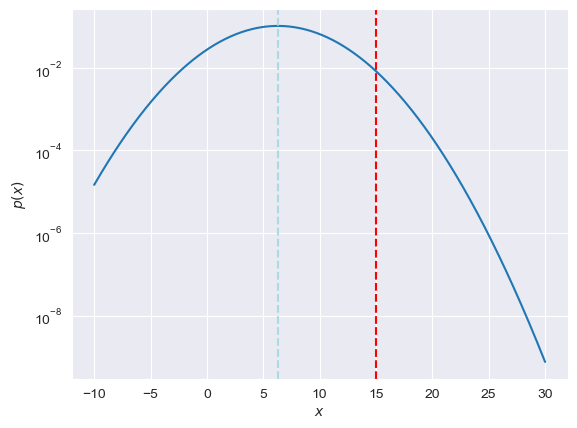

p-value = 0.02468285653931758


In [13]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
x0 = 15
mu = 6.3
sigma = np.sqrt(15)

Z = abs(x0 - mu) / sigma
print("Z =", Z)

w = mu - x0
x = np.linspace(-10,30, 500)
y = stats.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, y)

plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.yscale("log")
plt.show()

pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print("p-value =", pvalue)

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

-5.64532321355152 20


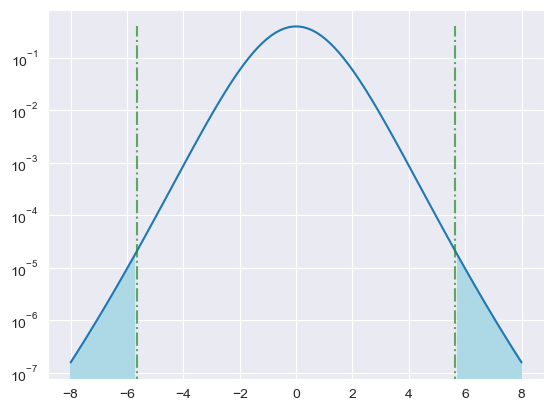

P-value = 0.002%
P-value = 0.002%
P-value is less than alpha/2=0.025 : True
nthe samples are to be considered significantly different.


In [5]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
alpha=0.05

def test_statistics(x1,x2):
    n = x1.size + x2.size #should n be the length of both arrays or just one?
    sigma=((np.var(x1)+np.var(x2))/2)**(0.5)
    return (np.mean(x1)-np.mean(x2))/(sigma*((2/n)**(0.5))),n 

T,n=test_statistics(pre,post)
print(T,n)

fig,ax = plt.subplots()
x = np.linspace(-8,8,100)
ts = stats.t.pdf(x,n-1)
ax.plot(x,ts)
ax.vlines([-T,T],0,ts.max(),linestyle='-.',alpha=0.7,color='forestgreen')
ax.set_yscale('log')
ax.fill_between(x, ts, where=np.abs(x) > np.abs(T), color='lightblue')

plt.show()

pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("P-value = {:.3%}".format(pvalue))
less = pvalue<alpha/2
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("P-value = {:.3%}".format(pvalue))
less = pvalue<alpha/2
print("P-value is less than alpha/2={} : {}".format(alpha/2,less))
if less: print("nthe samples are to be considered significantly different.")

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Parameters of fitting: 
	mean	sigma		offset		scale
max:
[  5.73581632   2.29443575  15.77931958 132.80945951]
min:
[  6.16452591   1.97590028 -61.3209382  260.76391875]


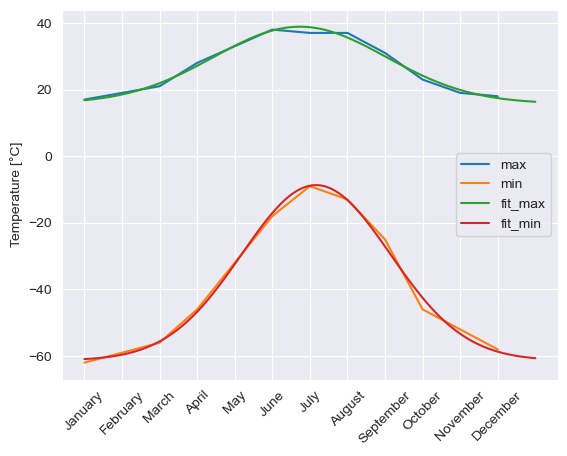

Covariance matrices
max:
[[ 6.31513591e-03 -2.12225901e-04  1.91641539e-03 -2.15104434e-02]
 [-2.12225901e-04  2.75437851e-02 -1.70932556e-01  2.17795463e+00]
 [ 1.91641539e-03 -1.70932556e-01  1.38431393e+00 -1.61250331e+01]
 [-2.15104434e-02  2.17795463e+00 -1.61250331e+01  2.03798213e+02]]
min:
[[ 2.22850085e-03 -4.92556726e-05  1.09102385e-03 -1.08267363e-02]
 [-4.92556726e-05  5.77328303e-03 -7.06521597e-02  8.74435805e-01]
 [ 1.09102385e-03 -7.06521597e-02  1.41331077e+00 -1.45310816e+01]
 [-1.08267363e-02  8.74435805e-01 -1.45310816e+01  1.78561002e+02]]

the fit is reasonable, the time offset is not the same within the fit accuracy


In [6]:
import math
from scipy import optimize, stats

t_max = np.asarray((17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18))
t_min = np.asarray((-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58))
months = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
x = np.arange(0, 12, 1)
plt.plot(x, t_max, label='max')
plt.plot(x, t_min, label='min')
plt.xticks(x, months, rotation=45)
plt.ylabel('Temperature [°C]')

def Q2(x, mean, sigma, offset, k):
    return k*(sigma*(2*math.pi)**0.5)**-1*np.exp(-(x-mean)**2/(2*sigma**2)) + offset

max_popt, max_pcov = optimize.curve_fit(Q2, x, t_max, p0=(6, 4, 20, 40), bounds=([0,0,0,0], [12,12,40,200]))
min_popt, min_pcov = optimize.curve_fit(Q2, x, t_min, p0=(6, 4, -70, 60), bounds=([0,0,-100,0], [12,12,0,400]))
#redefine x to plot smoother functions
x = np.linspace(0, 12, 100)
print("Parameters of fitting: ", "\tmean\tsigma\t\toffset\t\tscale\nmax:", max_popt, 'min:', min_popt, sep='\n')

plt.plot(x, Q2(x, max_popt[0], max_popt[1], max_popt[2], max_popt[3]), label = 'fit_max')
plt.plot(x, Q2(x, min_popt[0], min_popt[1], min_popt[2], min_popt[3]), label = 'fit_min')
plt.legend()
plt.show()
print("Covariance matrices", "max:", max_pcov, "min:", min_pcov, sep='\n')
print("\nthe fit is reasonable, the time offset is not the same within the fit accuracy")

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]
[  8.  13.   6.   9.  13.  19.  16.  15.  18.  15.  13.  15.  17.  17.
  28.  20.  18.  25.  14.  20.  20.  21.  24.  28.  30.  28.  27.  26.
  34.  32.  44.  47.  57.  87.  77. 107. 112. 125. 190. 200. 272. 322.
 351. 409. 493. 592. 656. 693. 655. 677. 645. 510. 431. 348. 285. 249.
 153. 170. 122. 113.  98.  67.  63.  49.  41.  43.  26.  34.  24.  20.
  25.  20.  18.  16.  21.  15.   8.   7.   6.  10.   5.  10.  10.   8.
   5.   4.   6.   8.   4.   5.   4.   3.   4.   6.   3.   3.   3.   4.
   1.   1.]


NameError: name 'sp' is not defined

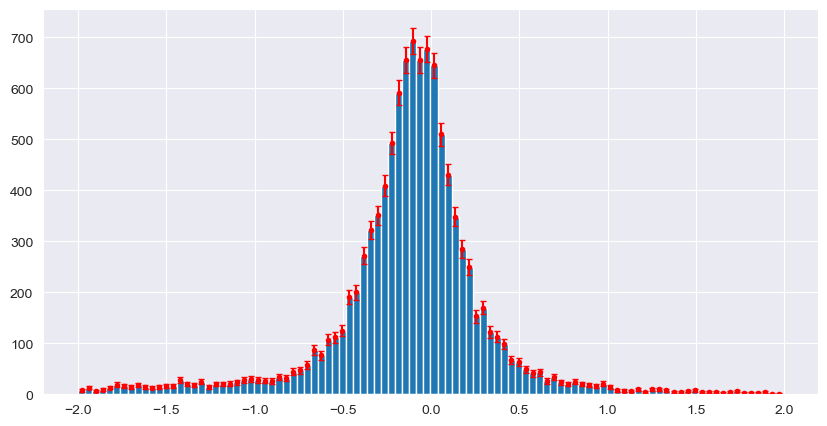

In [10]:
df=pd.DataFrame(np.load('residuals_261.pkl', allow_pickle=True).item())
print(df)
residuals=df['residuals'].values

residuals = residuals[residuals > -2]
residuals = residuals[residuals < 2]
distances = df['distances']

plt.figure(figsize=(10,5))
h, edges, _ = plt.hist(residuals, bins=100)
print(h)
midd = np.array([edges[i-1]+(edges[i]-edges[i-1])/2 for i in range(1,len(edges))])
plt.errorbar(midd, h, yerr = np.sqrt(h), fmt='r.', capsize=2)

def g(x, a, b, c, d):
    return a*np.exp(( ((x - b)**2)*c )) + d

opt3,_=sp.optimize.curve_fit(g ,midd , h, p0 = [500,0,0,0])
print(opt3)
plt.plot(midd , g(midd, *opt3))

ys=g(midd,*opt3)
ssr=np.sum(ys-h)**2
yt=np.mean(h)
tss=np.sum(yt-h)**2

R=1.-(ssr/tss)
#chi2 thest
sig=np.sqrt(np.abs(h))
chi2=np.sum(((h-ys)**2)/sig)
pvalue = 1. - stats.chi2.cdf(chi2, len(midd)-1)
print('\n the R^2 is: ',R)
print('the p-value is: ',pvalue, ' As we observe it is satisfactory. ')

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

best values: a= -9.988133687955633 b= 12.33302301418607 c= 9.38411486842026
for function: max hot= 19.372217150803 min cold= -0.6037792225784546
overal avg: 9.384097734976043
R2 = 0.6795934800804344 
R = 0.8243745993663526
Covariance matrix:
 [[1.         0.01341277]
 [0.01341277 1.        ]]
R2 = 0.679659357144089 
R = 0.8244145541801703
Covariance matrix:
 [[1.         0.01341277]
 [0.01341277 1.        ]]
SSR: 34359.85859996652 34352.79405398687
Test Linear vs f:
CL: 0.584 , additional parameter necessary: NO


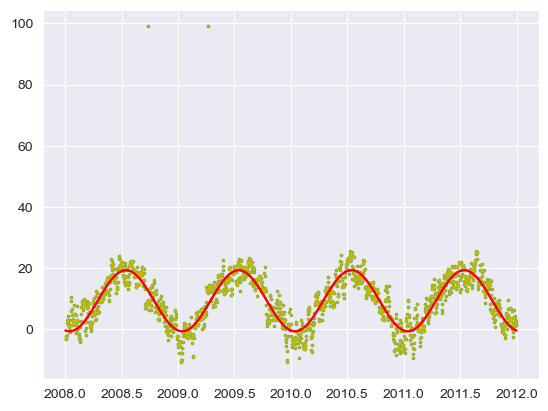

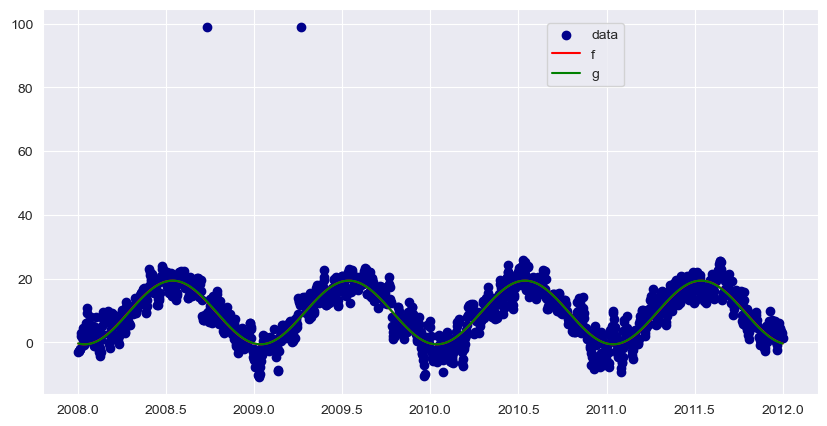

In [12]:
import numpy as np
def f(t,a,b,c):
    return a*np.cos(2*t*np.pi+b)+c

df=pd.read_csv("munich_temperatures_average_with_bad_data.txt",sep=" ",header=None)

df=df[(df[0]> 2008) & (df[0]<2012)]
import pylab as plb
import matplotlib.pyplot as plt
from scipy import optimize
plt.scatter(df[0],df[1],s=2)
x=df[0]
y=df[1]

popt, pcov = optimize.curve_fit(f, df[0], df[1])

plt.scatter(df[0],df[1],color='y',alpha=0.5, s=2)
plt.plot(df[0],f(df[0],*popt),'r')

print('best values:','a=',popt[0],'b=',popt[1],'c=',popt[2])
dd=np.linspace(int(np.min(df[0])),int(np.max(df[0])),1000)
mn=np.min(f(dd,*popt))
mx=np.max(f(dd,*popt))
print('for function:','max hot=',mx,'min cold=',mn)

def ff(t,a,b,c,d):
    return a*np.cos(2*t*np.pi*d+b)+c

popt1, pcov1 = optimize.curve_fit(ff, df[0], df[1])

popt1
plt.scatter(df[0],df[1],color='y',alpha=0.5, s=2)
plt.plot(df[0],ff(df[0],*popt1),'r')
popt1

print('overal avg:',np.mean(df[1]))

ssr = np.sum((y-(f(x,*popt)))**2)
tss = np.sum((np.mean(y) - y)**2)
rsq = 1 - ssr / tss
print("R2 =", rsq, "\nR =", np.sqrt(rsq))
print("Covariance matrix:\n", np.corrcoef(x,y)) 

ssr = np.sum((y-(ff(x,*popt1)))**2)
tss = np.sum((np.mean(y) - y)**2)
rsq = 1 - ssr / tss
print("R2 =", rsq, "\nR =", np.sqrt(rsq))
print("Covariance matrix:\n", np.corrcoef(x,y))

# define function for F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL


fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x=x, y=y, marker='o', c='darkblue', label="data")
N=len(x)
# define fitting functions
def f1(x, a0, a1):
    return a0 + a1 * x

def f2(x, a0, a1, a2):
        return a0 + a1 * x + a2 * x**2

def f3(x, a0, a1, a2, a3):
    return a0 + a1 * x + a2 * x**2 + a3 * x**3

fs, cov = optimize.curve_fit(f, x, y)
y1 = f(x, *fs)
ax.plot(x, y1, color='r', label="f")
ssr_1 = np.sum((y1 - y)**2)
ndof_1 = 3 - 1 

fg, cov = optimize.curve_fit(ff, x, y)
y2 = ff(x, *fg)
ax.plot(x, y2, color='g', label="g")
ssr_2 = np.sum((y2 - y)**2)
ndof_2 = 4 - 1

ax.legend(loc=(0.65, 0.8))

print("SSR:", ssr_1, ssr_2)


print("Test Linear vs f:")
cl_1_vs_2 = Ftest(ssr_1, ssr_2, ndof_1, ndof_2, N, verbose=True)
